In [1]:
import ROOT as R

Welcome to JupyROOT 6.24/06


In [2]:
f = R.TFile('output_2DHist_new.root')
h100 = f.Get('Cut100MeV_Origin').Clone()
h50 = f.Get('Cut50MeV_Origin').Clone()
h100.Rebin(4)
h50.Rebin(4)

Info in <TH2D::Rebin>: Rebinning only the x-axis. Use Rebin2D for rebinning both axes
Info in <TH2D::Rebin>: Rebinning only the x-axis. Use Rebin2D for rebinning both axes


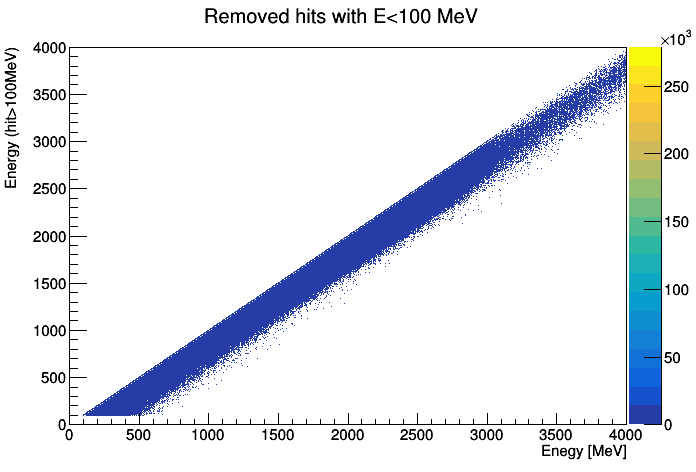

In [3]:
c = R.TCanvas()
h100.SetStats(0)
h100.SetTitle('Removed hits with E<100 MeV')
h100.Draw('COLZ')
c.Draw()

Warning in <TH1D::Rebin>: ngroup=6 is not an exact divider of nbins=4000.
Warning in <TH1D::Rebin>: ngroup=6 is not an exact divider of nbins=4000.
Warning in <TH1D::Rebin>: ngroup=6 is not an exact divider of nbins=4000.


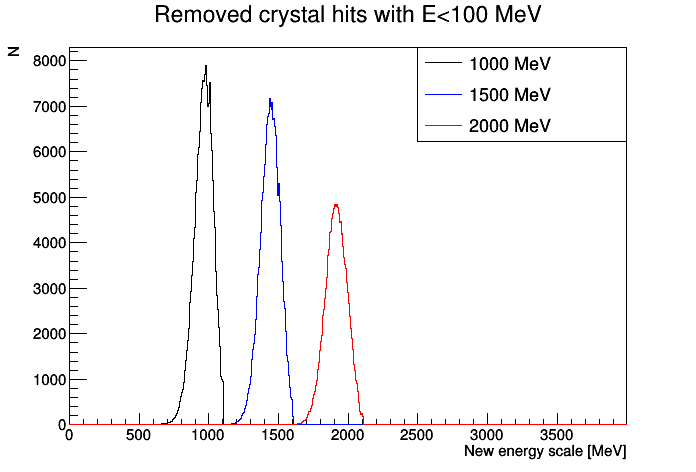

In [9]:
hists = []
colors = [R.kBlack,R.kBlue,R.kRed]
names = ['1000 MeV','1500 MeV','2000 MeV']
for n in range(3):
    start_x = 1000+500*n
    end_x = start_x + 100
    py = h100.ProjectionY('py_%s_%s'%(start_x,end_x),h100.GetXaxis().FindBin(start_x),h100.GetXaxis().FindBin(end_x))
    py.Rebin(6)
    hists.append(py)
    
    


c = R.TCanvas()
leg = R.TLegend(0.6,0.7,0.90,0.90)
for n in range(3):
    hist = hists[n]
    hist.SetStats(0)
    hist.SetLineColor(colors[n])
    leg.AddEntry(hist,names[n],'l')
    hist.SetTitle('Removed crystal hits with E<100 MeV;New energy scale [MeV];N')
    hist.Draw('SAME')
leg.Draw()
c.Draw()

    

In [11]:
means = []
energies = []
width = 4
for n in range(500):
    start_x = 1000 + n*4
    end_x = start_x+width
    # end_x = 1100 + n*100
    py = h100.ProjectionY('py_%s_%s'%(start_x,end_x),h100.GetXaxis().FindBin(start_x),h100.GetXaxis().FindBin(end_x))
    mean = py.GetMean()
    means.append(mean)
    energies.append(start_x)

    

In [12]:
graph = R.TGraph()
n = 0
for x,y in zip(energies,means):
    graph.SetPoint(n,x,y)
    n+=1


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      1072.34
NDf                       =          498
Edm                       =  4.46032e-15
NCalls                    =           39
p0                        =     0.951403   +/-   0.000113665 
p1                        =     -35.3103   +/-   0.236395    


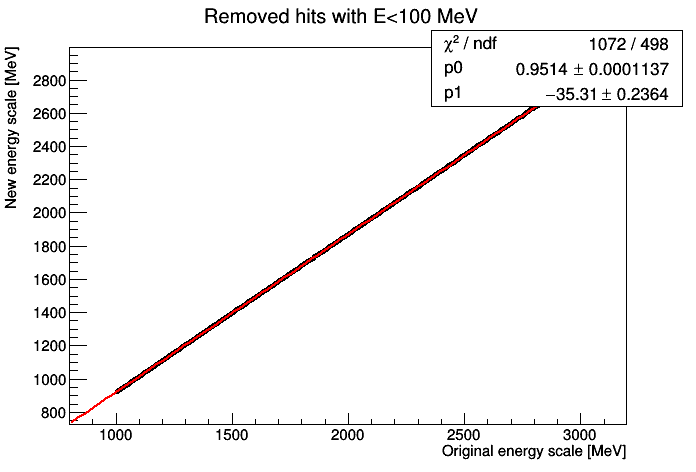

In [14]:
R.gStyle.SetOptFit(1)
f1 = R.TF1('f1','[0]*x+[1]',1200,2800,2)
c = R.TCanvas()
graph.SetTitle('Removed hits with E<100 MeV;Original energy scale [MeV];New energy scale [MeV]')
graph.Fit(f1)
graph.SetLineWidth(4)
graph.Draw('ALP')
c.Draw()

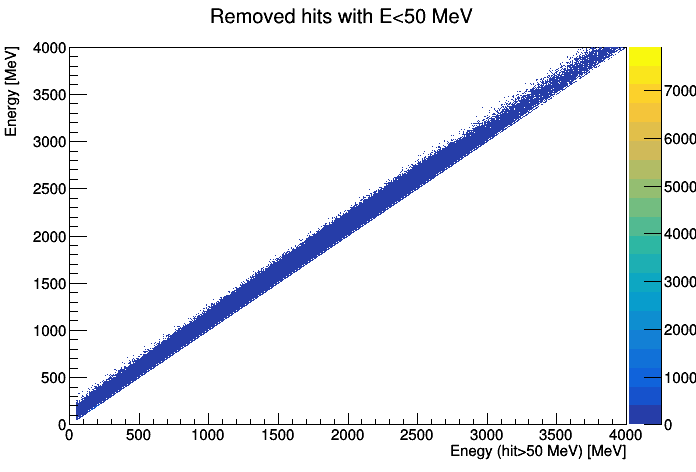

In [45]:
c = R.TCanvas()
h50.SetStats(0)
h50.SetTitle('Removed hits with E<50 MeV')
h50.Draw('COLZ')
c.Draw()

Warning in <TH1D::Rebin>: ngroup=6 is not an exact divider of nbins=4000.
Warning in <TH1D::Rebin>: ngroup=6 is not an exact divider of nbins=4000.
Warning in <TH1D::Rebin>: ngroup=6 is not an exact divider of nbins=4000.


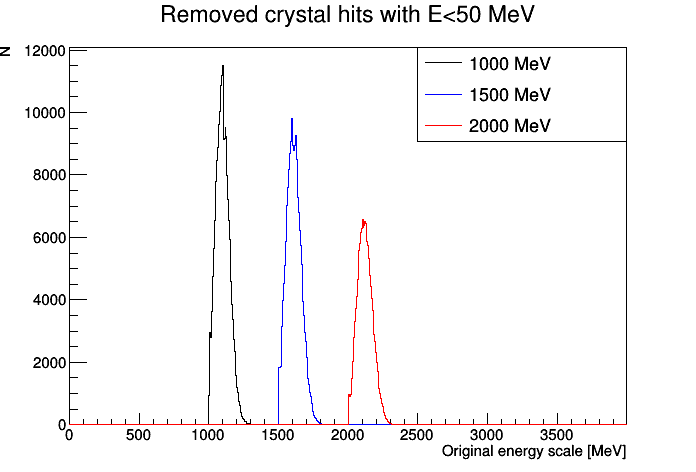

In [46]:
hists = []
colors = [R.kBlack,R.kBlue,R.kRed]
names = ['1000 MeV','1500 MeV','2000 MeV']
for n in range(3):
    start_x = 1000+500*n
    end_x = start_x + 100
    py = h50.ProjectionY('py_%s_%s'%(start_x,end_x),h50.GetXaxis().FindBin(start_x),h50.GetXaxis().FindBin(end_x))
    py.Rebin(6)
    hists.append(py)
    
    


c = R.TCanvas()
leg = R.TLegend(0.6,0.7,0.90,0.90)
for n in range(3):
    hist = hists[n]
    hist.SetStats(0)
    hist.SetLineColor(colors[n])
    leg.AddEntry(hist,names[n],'l')
    hist.SetTitle('Removed crystal hits with E<50 MeV;Original energy scale [MeV];N')
    hist.Draw('SAME')
leg.Draw()
c.Draw()

    


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      5267.63
NDf                       =          498
Edm                       =  2.67092e-15
NCalls                    =           39
p0                        =      1.01548   +/-   0.000251924 
p1                        =      36.4026   +/-   0.523937    


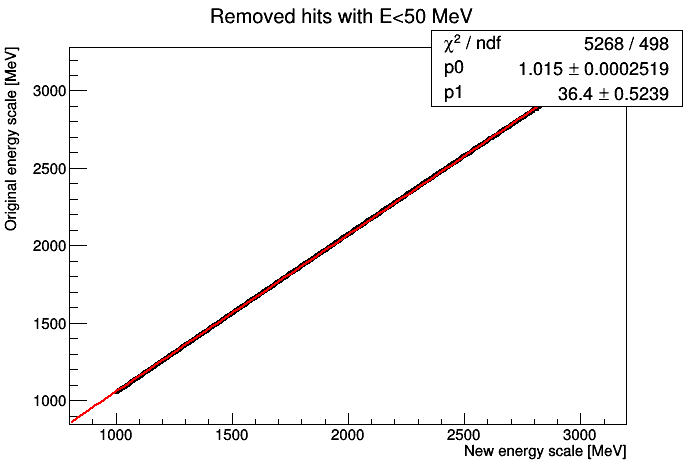

In [47]:
means = []
energies = []
width = 4
for n in range(500):
    start_x = 1000 + n*4
    end_x = start_x
    # end_x = 1100 + n*100
    py = h50.ProjectionY('py_%s_%s'%(start_x,end_x),h50.GetXaxis().FindBin(start_x),h50.GetXaxis().FindBin(end_x))
    mean = py.GetMean()
    means.append(mean)
    energies.append(start_x)

    

graph = R.TGraph()
n = 0
for x,y in zip(energies,means):
    graph.SetPoint(n,x,y)
    n+=1
    
f1 = R.TF1('f1','[0]*x+[1]',1200,2800,2)
c = R.TCanvas()
graph.SetTitle('Removed hits with E<50 MeV;New energy scale [MeV];Original energy scale [MeV]')
graph.Fit(f1)
graph.SetLineWidth(4)
graph.Draw('ALP')
c.Draw()